In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from datetime import datetime

# Load the customer data
customers = pd.read_csv('Customers.csv')

# Convert the 'SignupDate' column to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [7]:
customers['SignupYear'] = customers['SignupDate'].dt.year
customers['SignupMonth'] = customers['SignupDate'].dt.month
customers['SignupDay'] = customers['SignupDate'].dt.day

In [8]:
le = LabelEncoder()
customers['Region'] = le.fit_transform(customers['Region'])

In [9]:
features = ['Region', 'SignupYear', 'SignupMonth', 'SignupDay'] 

# Now, proceed with the KMeans clustering:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(customers[features])


C:\Users\bilvi\Downloads\jupiter\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bilvi\Downloads\jupiter\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.385
Calinski-Harabasz Index: 218.137
Davies-Bouldin Index: 0.962


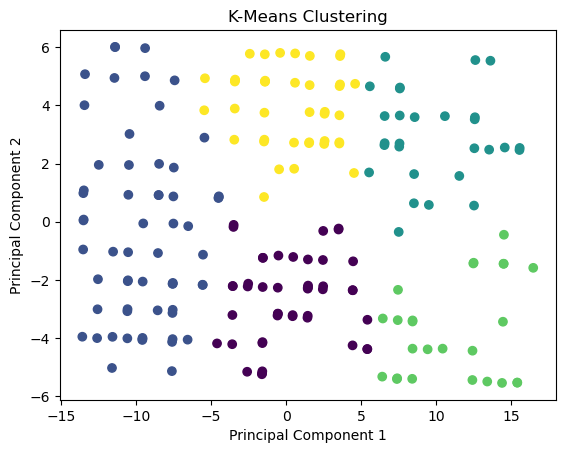

In [10]:
silhouette = silhouette_score(customers[features], cluster_labels)
calinski_harabasz = calinski_harabasz_score(customers[features], cluster_labels)
davies_bouldin = davies_bouldin_score(customers[features], cluster_labels)

# Print the clustering metrics
print(f'Silhouette Score: {silhouette:.3f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz:.3f}')
print(f'Davies-Bouldin Index: {davies_bouldin:.3f}')

# Perform PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(customers[features])

# Visualize the clusters using PCA
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.show()